<a href="https://colab.research.google.com/github/isha027/Clustering_Analysis_MNIST/blob/main/Clustering_Analysis_of_MNIST_dataset_(K_means_Algorithm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Reading MNIST Dataset:
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

# MNIST Data Loader Class
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath

    def read_images_labels(self, images_filepath, labels_filepath):
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())

        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img

        return images, labels

    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        # Data Preprocessing
        x_train = np.array(x_train)
        x_test = np.array(x_test)

        # Normalization
        x_train = x_train / 255.0
        x_test = x_test / 255.0

        # Reshaping
        x_train = x_train.reshape(len(x_train), -1)
        x_test = x_test.reshape(len(x_test), -1)
        return (x_train, y_train),(x_test, y_test)

# Verify Reading Dataset via MnistDataloader class
%matplotlib inline
import random
import matplotlib.pyplot as plt

# Set file paths based on added MNIST Datasets
training_images_filepath = '/content/train-images-idx3-ubyte'
training_labels_filepath = '/content/train-labels-idx1-ubyte'
test_images_filepath = '/content/t10k-images-idx3-ubyte'
test_labels_filepath = '/content/t10k-labels-idx1-ubyte'

# Load MINST dataset
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=10, n_init=10)

In [ ]:
kmeans.fit(x_train)
cluster_assignments = kmeans.predict(x_test)

In [ ]:
def ClusterAnalysis(ca):
  # Analyzing the resulting clusters
  from collections import Counter
  cluster_counts = Counter(ca)
  print(cluster_counts)
  # Visualizing representative images from each cluster
  n_clusters = kmeans.n_clusters
  fig, axes = plt.subplots(n_clusters, 5, figsize=(10, 10))

  for cluster in range(n_clusters):
      # Get the indices of samples in the current cluster
      cluster_indices = np.where(cluster_assignments == cluster)[0]

      # Randomly select 5 images from the cluster
      random_indices = np.random.choice(cluster_indices, size=5, replace=False)

      # Plot the images in the corresponding subplot
      for i, idx in enumerate(random_indices):
          ax = axes[cluster, i]
          ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')
          ax.axis('off')

  plt.tight_layout()
  plt.show()
  # Calculate cluster centroids (mean images)
  centroids = kmeans.cluster_centers_.reshape(-1, 28, 28)

  # Display the cluster centroids
  fig, axes = plt.subplots(1, n_clusters, figsize=(10, 10))
  for cluster in range(n_clusters):
      ax = axes[cluster]
      ax.imshow(centroids[cluster], cmap='gray')
      ax.axis('off')

  plt.tight_layout()
  plt.show()
  # Evaluate clustering performance
  inertia = kmeans.inertia_
  print("Inertia:", inertia)

  from sklearn import metrics
  silhouette_score = metrics.silhouette_score(x_test, cluster_assignments)
  print("Silhouette Score:", silhouette_score)

Counter({2: 1553, 5: 1427, 3: 1317, 4: 1094, 8: 995, 1: 927, 9: 848, 0: 801, 6: 546, 7: 492})


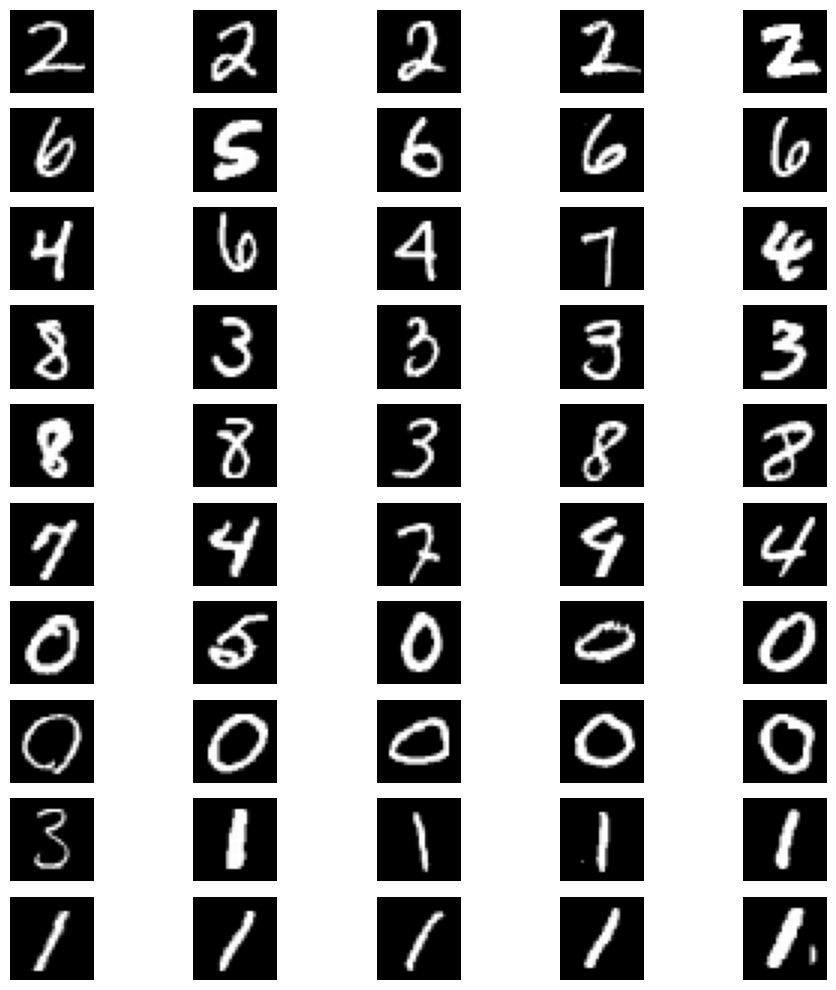

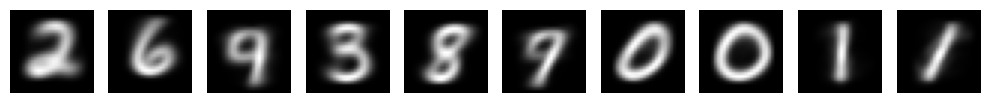

Inertia: 2352827.581522541
Silhouette Score: 0.060565103035311686


In [ ]:
ClusterAnalysis(cluster_assignments)

Counter({4: 2925, 1: 2221, 3: 2171, 0: 1778, 2: 905})


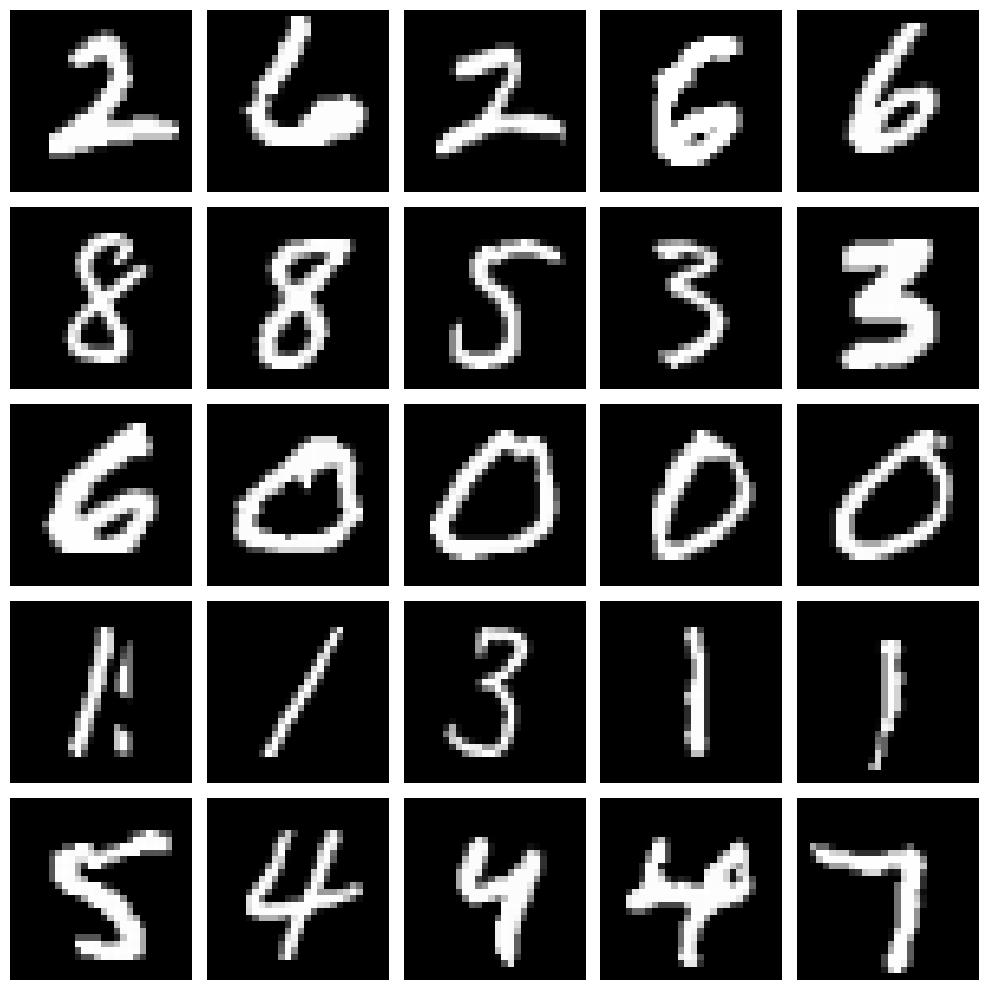

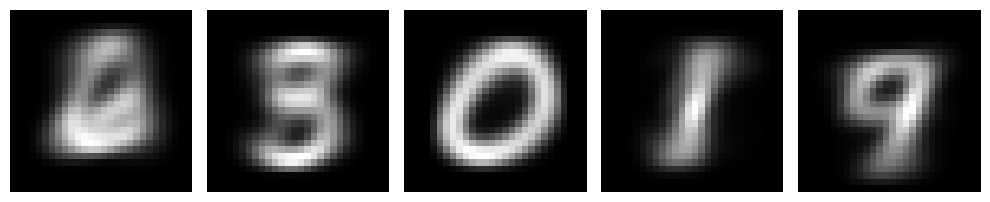

Inertia: 2605960.4135112828
Silhouette Score: 0.07005167073812965
Counter({8: 1546, 5: 1427, 6: 1313, 3: 1090, 2: 995, 9: 929, 0: 855, 1: 800, 7: 549, 4: 496})


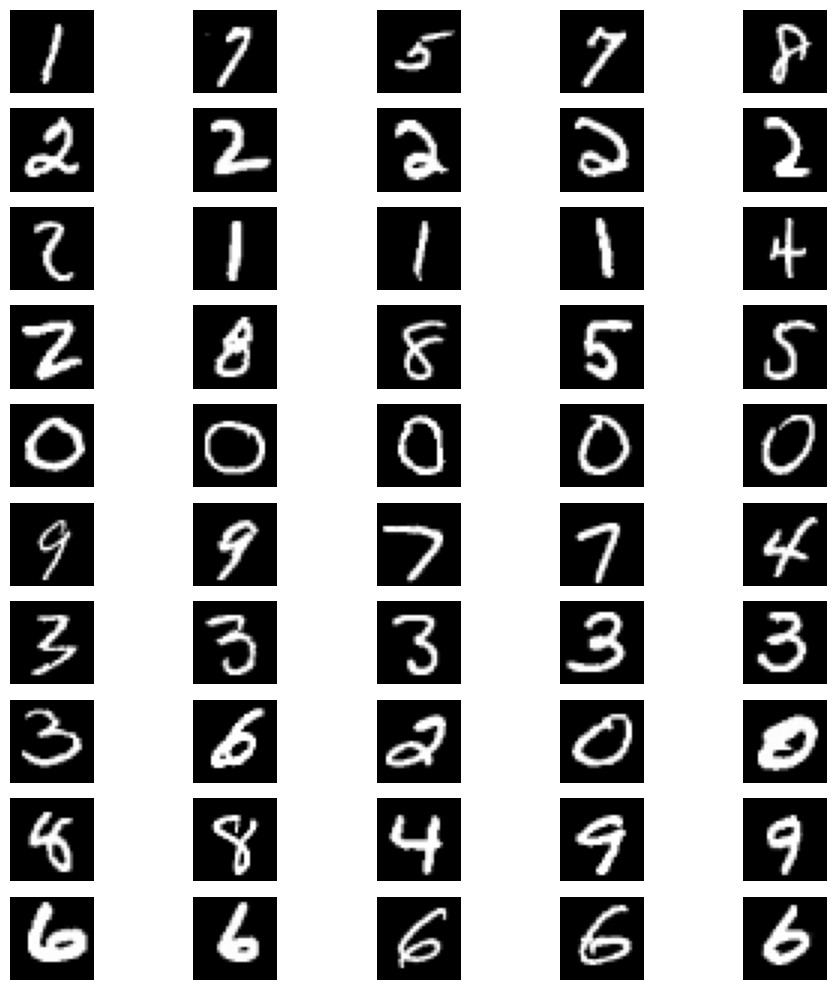

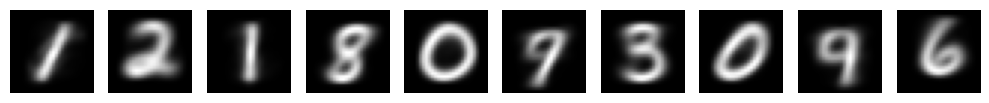

Inertia: 2352827.071529638
Silhouette Score: 0.06063106913006423
Counter({3: 1038, 1: 861, 13: 844, 4: 787, 5: 751, 7: 733, 14: 730, 2: 710, 0: 627, 10: 525, 6: 514, 11: 494, 9: 486, 12: 482, 8: 418})


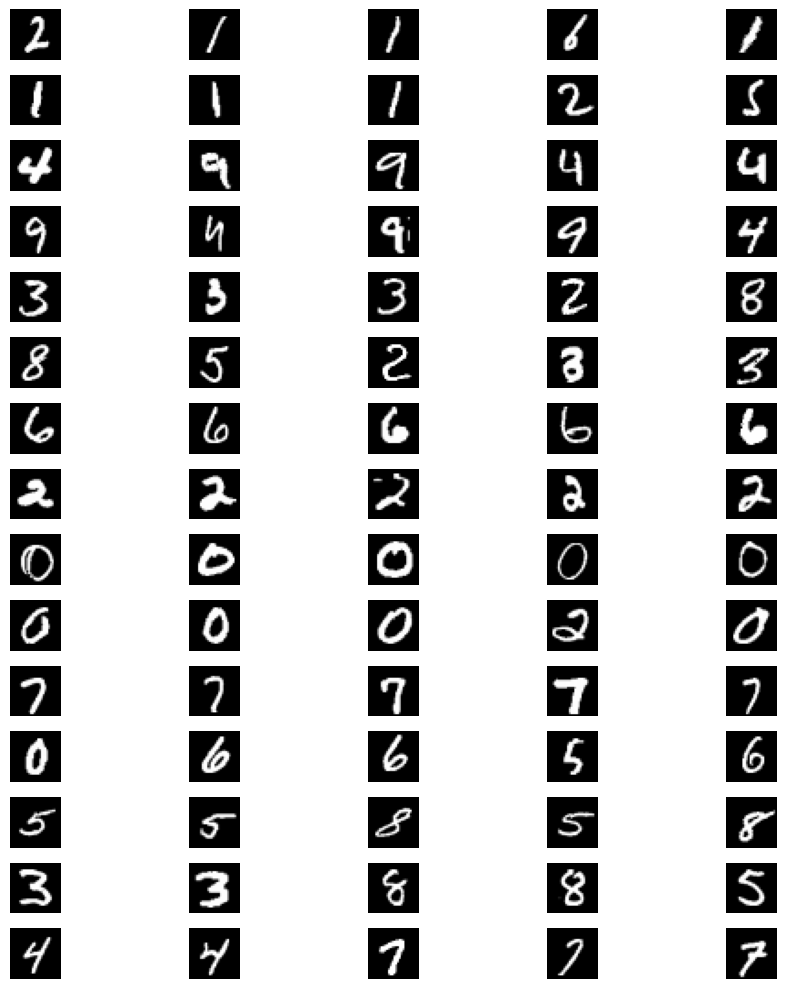

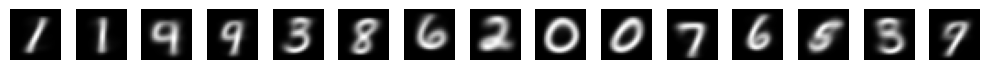

Inertia: 2205876.2575687487
Silhouette Score: 0.06462951282052529


In [ ]:
k_values = [5, 10, 15]  # Example list of different values of k

for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(x_train)
    cluster_assignments = kmeans.predict(x_test)

    ClusterAnalysis(cluster_assignments)

In [ ]:
from skimage.feature import canny

edge_images = np.zeros((len(x_train), 28, 28))  # Initialize edge_images with the appropriate shape

for i, image in enumerate(x_train):
    image_2D = image.reshape(28, 28)  # Reshape image from 1D to 2D
    edge_image = canny(image_2D)
    edge_images[i] = edge_image

# Reshape the edge images into 1D vectors
edge_images = edge_images.reshape(len(x_train), -1)

In [ ]:
# Perform clustering and further analysis on the edge images
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(edge_images)
cluster_assignments = kmeans.predict(x_test)

Counter({8: 1640, 2: 1569, 7: 1311, 3: 1075, 9: 914, 4: 871, 5: 817, 0: 651, 6: 646, 1: 506})


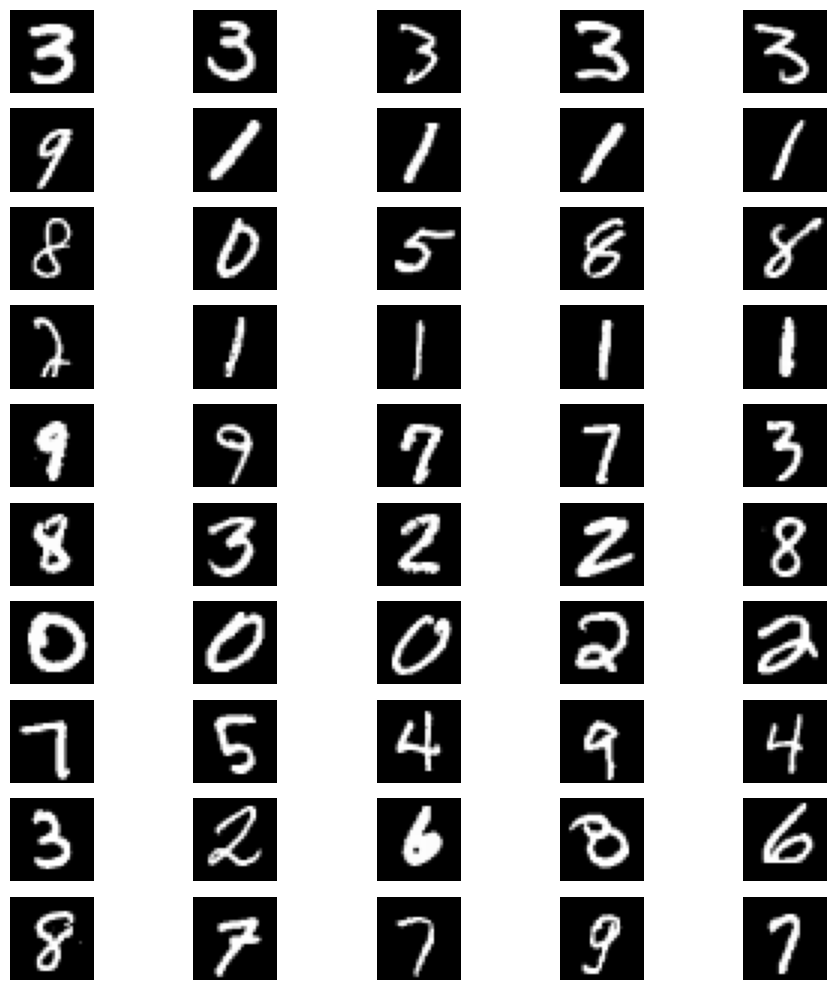

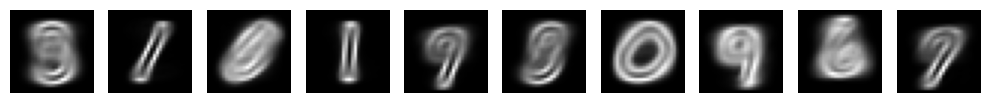

Inertia: 3560743.203681651
Silhouette Score: 0.01671022862154831


In [ ]:
ClusterAnalysis(cluster_assignments)

In [ ]:
# Perform PCA to reduce the dimensionality of the training data
from sklearn.decomposition import PCA
pca = PCA(n_components=50, random_state=42)
reduced_data = pca.fit_transform(x_train)

# Apply the same dimensionality reduction to the test data
reduced_test_data = pca.transform(x_test)

# Fit KMeans model on the reduced training data
kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(reduced_data)

# Predict clusters for the reduced test data
cluster_assignments = kmeans.predict(reduced_test_data)

def PCAClusterAnalysis(ca):
  # Analyzing the resulting clusters
  from collections import Counter
  cluster_counts = Counter(cluster_assignments)
  print(cluster_counts)

  # Visualizing representative images from each cluster
  n_clusters = kmeans.n_clusters
  fig, axes = plt.subplots(n_clusters, 5, figsize=(10, 10))

  for cluster in range(n_clusters):
      # Get the indices of samples in the current cluster
      cluster_indices = np.where(cluster_assignments == cluster)[0]

      # Randomly select 5 images from the cluster
      random_indices = np.random.choice(cluster_indices, size=5, replace=False)

      # Plot the images in the corresponding subplot
      for i, idx in enumerate(random_indices):
          ax = axes[cluster, i]
          ax.imshow(x_test[idx].reshape(28, 28), cmap='gray')
          ax.axis('off')

  plt.tight_layout()
  plt.show()
  # Calculate cluster centroids (mean images)
  centroids = pca.inverse_transform(kmeans.cluster_centers_)

  # Display the cluster centroids
  fig, axes = plt.subplots(1, n_clusters, figsize=(10, 10))
  for cluster, centroid in enumerate(centroids):
      ax = axes[cluster]
      ax.imshow(centroid.reshape(28, 28), cmap='gray')
      ax.axis('off')

  plt.tight_layout()
  plt.show()
  # Evaluate clustering performance
  inertia = kmeans.inertia_
  print("Inertia:", inertia)

  from sklearn import metrics
  silhouette_score = metrics.silhouette_score(reduced_test_data, cluster_assignments)
  print("Silhouette Score:", silhouette_score)

Counter({0: 1542, 3: 1386, 2: 1301, 1: 985, 9: 972, 7: 780, 4: 774, 5: 773, 8: 766, 6: 721})


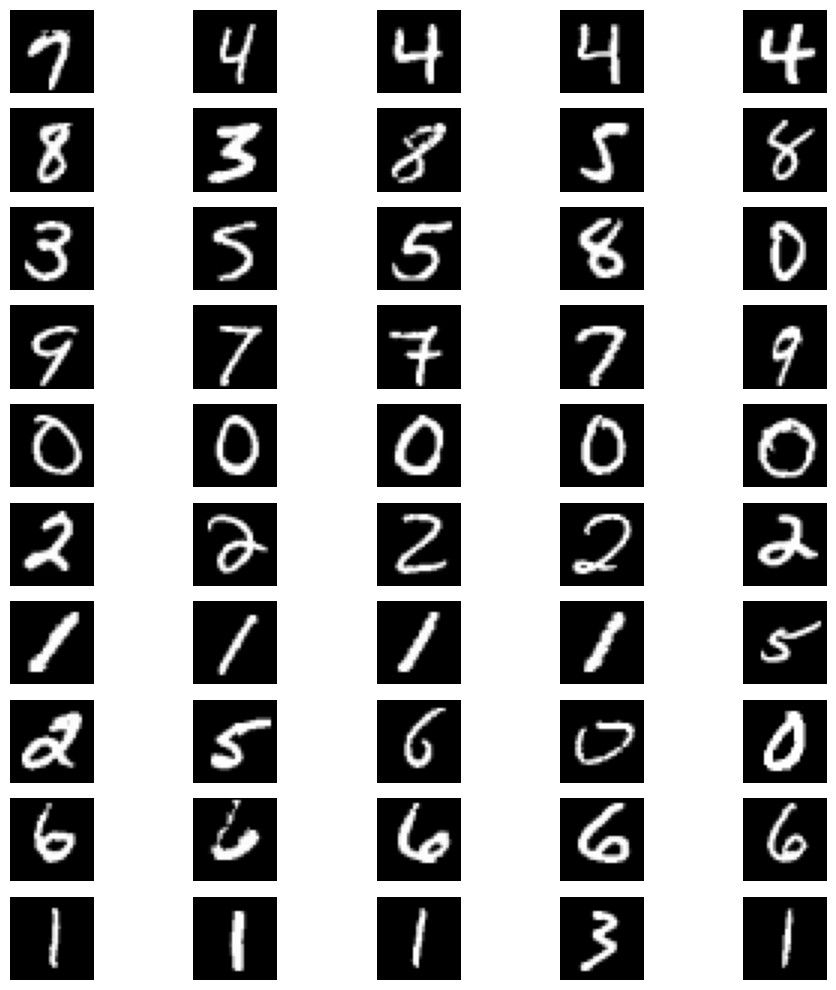

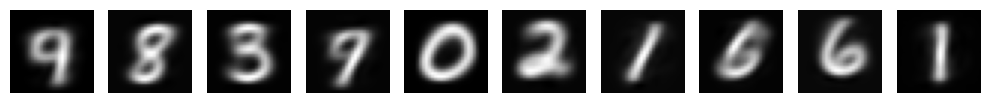

Inertia: 1799435.4297018675
Silhouette Score: 0.08808341943982871


In [ ]:
PCAClusterAnalysis(cluster_assignments)

In [ ]:
from sklearn.manifold import TSNE

# Perform t-SNE on the reduced data
tsne = TSNE(n_components=2, random_state=42)
embedding = tsne.fit_transform(reduced_data)

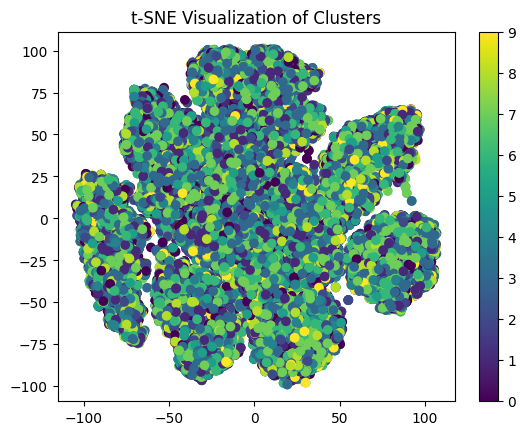

In [ ]:
# Visualize the reduced data in a scatter plot
# Repeat the cluster_assignments array to match the size of x_train and y_train
cluster_assignments = np.repeat(cluster_assignments, 6)

# Visualize the reduced data in a scatter plot
plt.scatter(embedding[:, 0], embedding[:, 1], c=cluster_assignments, cmap='viridis')
plt.colorbar()
plt.title('t-SNE Visualization of Clusters')
plt.show()